# TO DO: split the data into training and testing samples

### First, joing the test and train data into one, to split them and train the coding

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [250]:
data_train = pd.read_csv("./data/train.csv")
data_test = pd.read_csv("./data/test.csv")

In [251]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [252]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   lot_size        428 non-null    float64
 5   lot_size_units  428 non-null    object 
 6   zip_code        505 non-null    int64  
 7   price           505 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.7+ KB


In [253]:
data_train.columns == data_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [254]:
union_df = pd.concat([data_train, data_test], ignore_index=True, sort=False)

In [255]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 157.7+ KB


In [256]:
union_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [257]:
data = union_df.copy()

In [258]:
data.describe(include="all")

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
count,2521.000000,2521.000000,2521.000000,2521,2097.000000,2097,2521.000000,2.521000e+03
unique,NaN,NaN,NaN,1,NaN,2,NaN,NaN
top,NaN,NaN,NaN,sqft,NaN,sqft,NaN,NaN
freq,NaN,NaN,NaN,2521,NaN,1818,NaN,NaN
mean,2.877033,2.171956,1758.998017,NaN,3896.245794,NaN,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,NaN,2714.651578,NaN,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,NaN,0.230000,NaN,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,NaN,1263.000000,NaN,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,NaN,4001.000000,NaN,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,NaN,6000.000000,NaN,98126.000000,1.115000e+06


In [259]:
data["size_units"].value_counts()

size_units
sqft    2521
Name: count, dtype: int64

In [260]:
data["lot_size_units"].value_counts()

lot_size_units
sqft    1818
acre     279
Name: count, dtype: int64

##### I have to change the units to the same units, but first lets drop the column not needed.

In [261]:
data.drop(columns=["zip_code","size_units"], inplace=True)

In [262]:
data.isnull().sum()

beds                0
baths               0
size                0
lot_size          424
lot_size_units    424
price               0
dtype: int64

##### What is the proportion potentially dropped?

In [263]:
424/2521

0.16818722729075763

In [264]:
data.dropna(axis=0, inplace=True)

In [265]:
data_no_missing_values = data.copy()

In [266]:
data_no_missing_values.head()

,beds,baths,size,lot_size,lot_size_units,price
0,3,2.5,2590.0,6000.00,sqft,795000.0
1,4,2.0,2240.0,0.31,acre,915000.0
2,4,3.0,2040.0,3783.00,sqft,950000.0
3,4,3.0,3800.0,5175.00,sqft,1950000.0
5,2,2.0,1190.0,1.00,acre,740000.0


In [267]:
conversion_factors = {
    'acre': 43560,
    'sqm': 10.7639,
    'sqft': 1
}

data_no_missing_values["lot_size_in_sqft"] = data_no_missing_values.apply (lambda row: row["lot_size"] * conversion_factors.get(row["lot_size_units"], 1), axis=1)

In [268]:
data_no_missing_values.columns

Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price',
       'lot_size_in_sqft'],
      dtype='object')

In [269]:
data_no_missing_values.drop(columns=['lot_size', 'lot_size_units'], axis=1, inplace=True)

In [270]:
data_no_missing_values.rename(columns={"size": "size_in_sqft"}, inplace=True)

In [271]:
data_no_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              2097 non-null   int64  
 1   baths             2097 non-null   float64
 2   size_in_sqft      2097 non-null   float64
 3   price             2097 non-null   float64
 4   lot_size_in_sqft  2097 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 98.3 KB


In [272]:
data_no_missing_values.describe(include="all")

,beds,baths,size_in_sqft,price,lot_size_in_sqft
count,2097.000000,2097.000000,2097.000000,2.097000e+03,2.097000e+03
mean,3.137339,2.305436,1916.727706,1.039809e+06,1.678385e+04
std,1.175945,1.010824,915.073679,9.415656e+05,2.571518e+05
min,1.000000,0.500000,250.000000,1.590000e+05,5.000000e+02
25%,2.000000,1.500000,1280.000000,6.850000e+05,3.000000e+03
50%,3.000000,2.000000,1740.000000,8.700000e+05,5.000000e+03
75%,4.000000,3.000000,2390.000000,1.180000e+06,7.407000e+03
max,15.000000,9.000000,11010.000000,2.500000e+07,1.089000e+07


### Here I have the data prepared for the final preprocessing - outliers cut.

In [273]:
data_clean = data_no_missing_values.copy()

In [274]:
sns.set_theme(style="darkgrid")

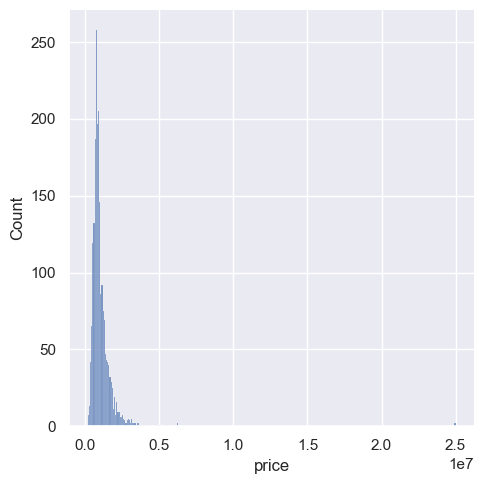

In [275]:
sns.displot(data_clean["price"])

##### Lets drop above q3 + 1,5 * interquartille range in price.

In [276]:
q1 = data_clean["price"].quantile(0.25)
q3 = data_clean["price"].quantile(0.75)
iqr = q3 - q1
outlier_price = q3 + 1.5 * iqr
outlier_price

1922500.0

In [277]:
data_clean[data_clean["price"] < outlier_price].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              1962 non-null   int64  
 1   baths             1962 non-null   float64
 2   size_in_sqft      1962 non-null   float64
 3   price             1962 non-null   float64
 4   lot_size_in_sqft  1962 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 92.0 KB


In [278]:
data_price_outliers = data_clean[data_clean["price"] < outlier_price]

In [279]:
data_price_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1962 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              1962 non-null   int64  
 1   baths             1962 non-null   float64
 2   size_in_sqft      1962 non-null   float64
 3   price             1962 non-null   float64
 4   lot_size_in_sqft  1962 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 92.0 KB


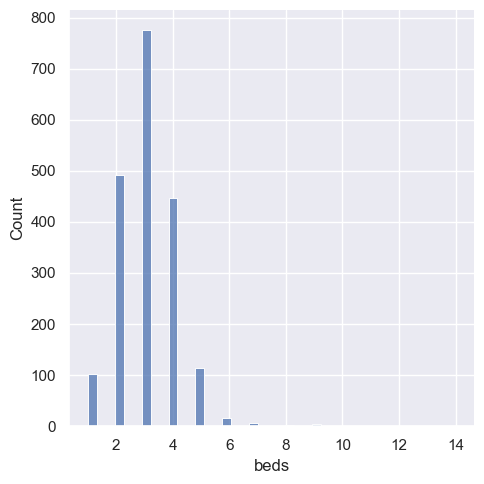

In [280]:
sns.displot(data_price_outliers["beds"])

##### Get rid of the beds outliers base on IQR again.

In [281]:
q1 = data_price_outliers["beds"].quantile(0.25)
q3 = data_price_outliers["beds"].quantile(0.75)
iqr = q3 - q1
outlier_beds = q3 + 1.5 * iqr
outlier_beds

7.0

In [282]:
data_beds_outliers = data_price_outliers[data_price_outliers["beds"] < outlier_beds]

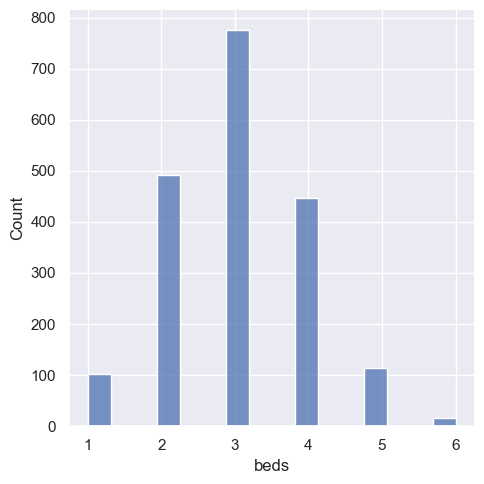

In [283]:
sns.displot(data_beds_outliers["beds"])

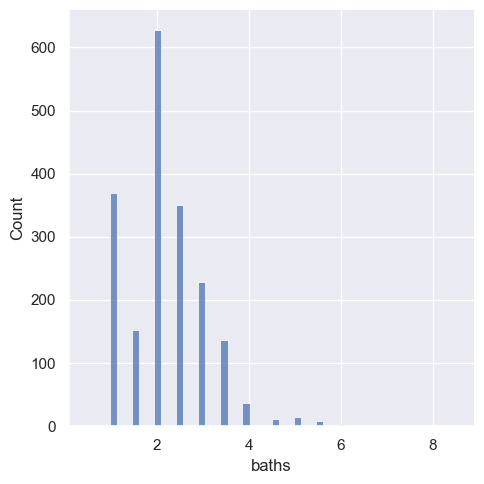

In [284]:
sns.displot(data_beds_outliers["baths"])

##### Get rid of baths outliers based on IQR again.

In [285]:
q1 = data_beds_outliers["baths"].quantile(0.25)
q3 = data_beds_outliers["baths"].quantile(0.75)
iqr = q3 - q1
outlier_baths = q3 + 1.5 * iqr
outlier_baths

4.0

In [286]:
data_baths_outliers = data_beds_outliers[data_beds_outliers["baths"] < outlier_baths]

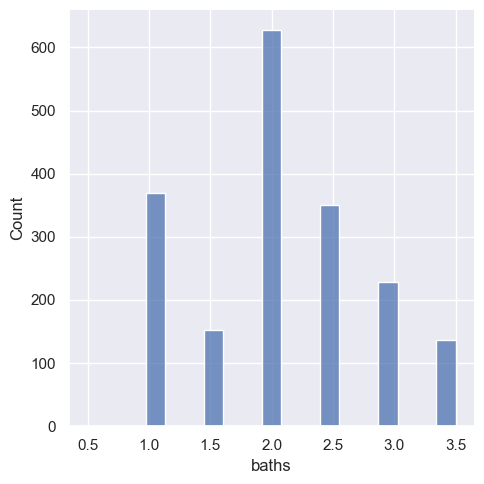

In [287]:
sns.displot(data_baths_outliers["baths"])

In [288]:
data_baths_outliers = data_baths_outliers[data_baths_outliers["baths"] >= 1]

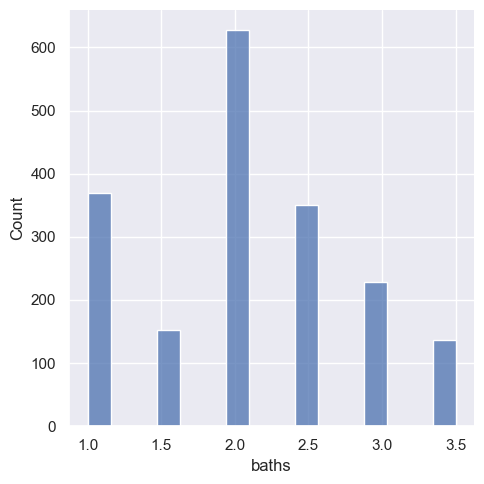

In [289]:
sns.displot(data_baths_outliers["baths"])

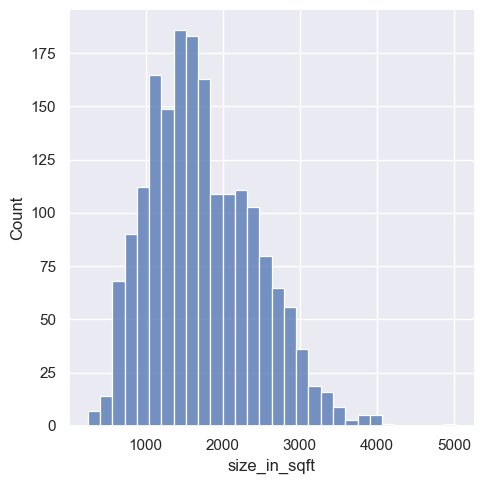

In [290]:
sns.displot(data_baths_outliers["size_in_sqft"])

In [291]:
q = data_baths_outliers["size_in_sqft"].quantile(0.99)
q

3517.199999999998

In [292]:
data_size_in_sqt_outliers = data_baths_outliers[data_baths_outliers["size_in_sqft"] < q]

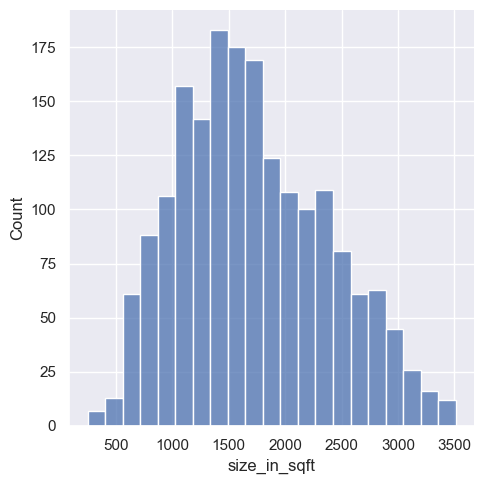

In [293]:
sns.displot(data_size_in_sqt_outliers["size_in_sqft"])

In [294]:
data_size_in_sqt_outliers["lot_size_in_sqft"].describe()

count    1.846000e+03
mean     1.802794e+04
std      2.740411e+05
min      5.000000e+02
25%      2.504000e+03
50%      5.000000e+03
75%      7.311500e+03
max      1.089000e+07
Name: lot_size_in_sqft, dtype: float64

In [295]:
q1 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.25)
q3 = data_size_in_sqt_outliers["lot_size_in_sqft"].quantile(0.75)
iqr = q3 - q1
outlier_size_in_sqt_ouliers = q3 + 1.5 * iqr
outlier_size_in_sqt_ouliers

14522.75

In [296]:
data_prepro = data_size_in_sqt_outliers[data_size_in_sqt_outliers["lot_size_in_sqft"] < outlier_size_in_sqt_ouliers]

In [297]:
data_prepro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 0 to 2520
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   beds              1689 non-null   int64  
 1   baths             1689 non-null   float64
 2   size_in_sqft      1689 non-null   float64
 3   price             1689 non-null   float64
 4   lot_size_in_sqft  1689 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 79.2 KB


In [298]:
data_clean = data_prepro.copy()

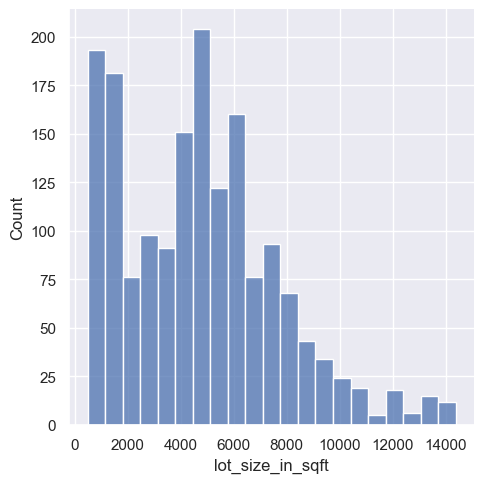

In [299]:
sns.displot(data_clean["lot_size_in_sqft"])

In [300]:
data_clean.describe(include="all")

,beds,baths,size_in_sqft,price,lot_size_in_sqft
count,1689.000000,1689.000000,1689.000000,1.689000e+03,1689.000000
mean,3.023683,2.112197,1758.069272,9.030834e+05,4769.003789
std,0.909746,0.727339,641.627676,3.231774e+05,2932.267641
min,1.000000,1.000000,376.000000,1.594880e+05,500.000000
25%,2.000000,1.500000,1280.000000,6.850000e+05,2250.000000
50%,3.000000,2.000000,1670.000000,8.500000e+05,4800.000000
75%,4.000000,2.500000,2220.000000,1.062500e+06,6380.000000
max,6.000000,3.500000,3510.000000,1.900000e+06,14374.800000


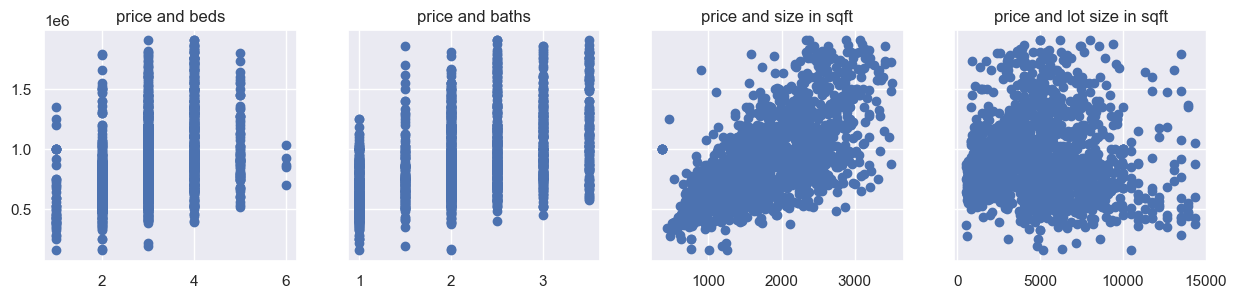

In [301]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(data_clean["beds"],data_clean["price"])
ax1.set_title("price and beds")
ax2.scatter(data_clean["baths"],data_clean["price"])
ax2.set_title("price and baths")
ax3.scatter(data_clean["size_in_sqft"],data_clean["price"])
ax3.set_title("price and size in sqft")
ax4.scatter(data_clean["lot_size_in_sqft"],data_clean["price"])
ax4.set_title("price and lot size in sqft")
plt.show()

#### Since variable "lot size in sqft" seems to have no impact on the price, I will drop it. Otherwise, I should have done some ZIP code classification in the relation to the city center distance, maybe, or commuting time?

In [302]:
data_clean.drop(columns=["lot_size_in_sqft"], inplace=True, axis = 1)

### Do the linear regression basics and checkt the relevance of the variables

In [308]:
x = data_clean[["beds", "baths","size_in_sqft"]]
y = data_clean["price"]

In [305]:
reg = LinearRegression()

In [309]:
reg.fit(x, y)

LinearRegression()

In [310]:
reg.score(x, y)

0.46352872244332055